### Variables categoricas ordinales

1. Importe los datos del archivo `data.csv`

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Almacenamos la ruta de los archivos en una variable
ruta='/content/drive/MyDrive/Maestria/Clase 1/'

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
data=pd.read_csv(ruta+'data.csv',encoding='latin-1',sep=',')
data.head(5)

,Escolaridad,No. de hijos
0,Primaria trunca,9
1,Secundaria,3
2,Preparatoria,2
3,Sin escolaridad,3
4,Primaria,2


2. Sustituya ahora la variable categórica por valores resultantes de un polinomio cuadrático estrictamente decreciente.

In [21]:
catego=data['Escolaridad'].unique()
catego

array(['Primaria trunca', 'Secundaria', 'Preparatoria', 'Sin escolaridad',
       'Primaria'], dtype=object)

In [22]:
Escolaridad_ord=np.concatenate([catego[3:4],  catego[0:1],  catego[4:5],catego[1:3] ])

Escolaridad_ord

array(['Sin escolaridad', 'Primaria trunca', 'Primaria', 'Secundaria',
       'Preparatoria'], dtype=object)

In [23]:
n = len(Escolaridad_ord)
a2 = -1.0
a1 = 0.0
a0 = -a2/n * np.sum([i**2 for i in range(n)])

In [24]:
escolaridad_valores = a0 + a1 * np.arange(n) + a2 * np.arange(n)**2
escolaridad_valores


array([  6.,   5.,   2.,  -3., -10.])

In [25]:
# Crear diccionario para mapear valores de escolaridad a cada categoría
escolaridad_dict = dict(zip(Escolaridad_ord, escolaridad_valores))
escolaridad_dict

{'Sin escolaridad': 6.0,
 'Primaria trunca': 5.0,
 'Primaria': 2.0,
 'Secundaria': -3.0,
 'Preparatoria': -10.0}

In [26]:
np.sum(list(escolaridad_dict.values()))

0.0

In [27]:
data['Escolaridad_cuad'] = data['Escolaridad'].map(escolaridad_dict)
data.head()

,Escolaridad,No. de hijos,Escolaridad_cuad
0,Primaria trunca,9,5.0
1,Secundaria,3,-3.0
2,Preparatoria,2,-10.0
3,Sin escolaridad,3,6.0
4,Primaria,2,2.0


In [28]:
data

,Escolaridad,No. de hijos,Escolaridad_cuad
0,Primaria trunca,9,5.0
1,Secundaria,3,-3.0
2,Preparatoria,2,-10.0
3,Sin escolaridad,3,6.0
4,Primaria,2,2.0
...,...,...,...
5055,Secundaria,1,-3.0
5056,Preparatoria,3,-10.0
5057,Primaria,1,2.0
5058,Secundaria,3,-3.0


Ahora obtendremos la codificacion lineal para posteriormente poder entrenar nuestro modelo de regresion lineal

3. Obtenga una relación lineal usando la clase *LinearRegression* del paquete *sklearn.linear_model*, para la codificacón obtenida y la variable `No. de hijos` y grafique.

In [29]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

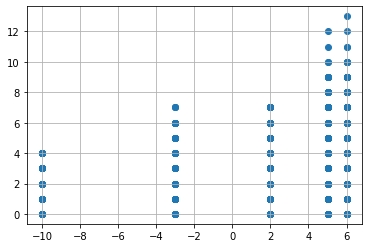

In [30]:
plt.scatter(data['Escolaridad_cuad'],data['No. de hijos'])
plt.grid()

In [31]:
lin=LinearRegression()
lin.fit(data[['Escolaridad_cuad']],data['No. de hijos'])

LinearRegression()

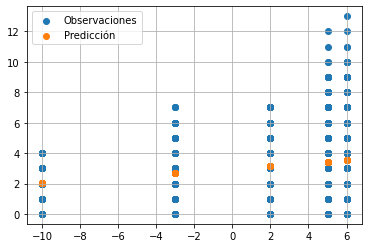

In [32]:
f=lin.predict(data[['Escolaridad_cuad']])
plt.scatter(data['Escolaridad_cuad'],data['No. de hijos'],label='Observaciones')
plt.scatter(data['Escolaridad_cuad'],f,label='Predicción')
plt.legend()
plt.grid()